In [2]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=a98c02087c5b4a5ec62a489cd8b532e1e12ac825b056a5db930e2a29a5c9bb86
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


   id_t2  timers  height  distance  overload  speed
0      1      60       9         3        21   1530
1      1      61      10         4        21   1582
2      1      62      10         4        22   1634
3      1      63      11         4        22   1681
4      1      64      11         5        22   1735


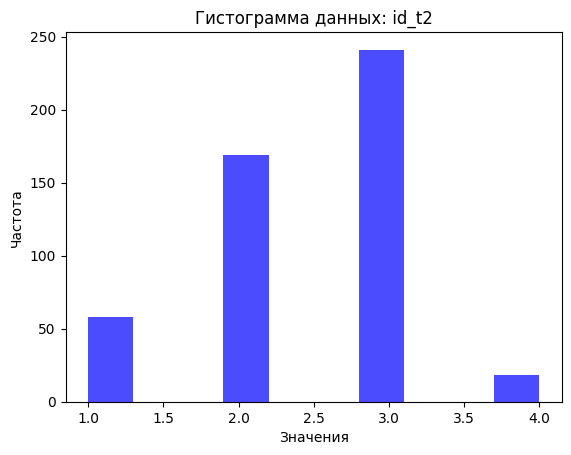

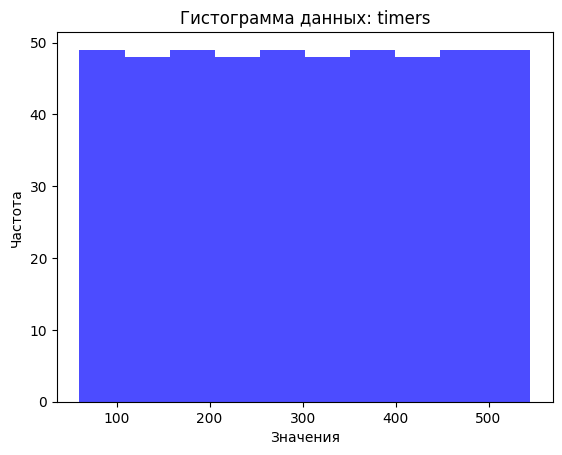

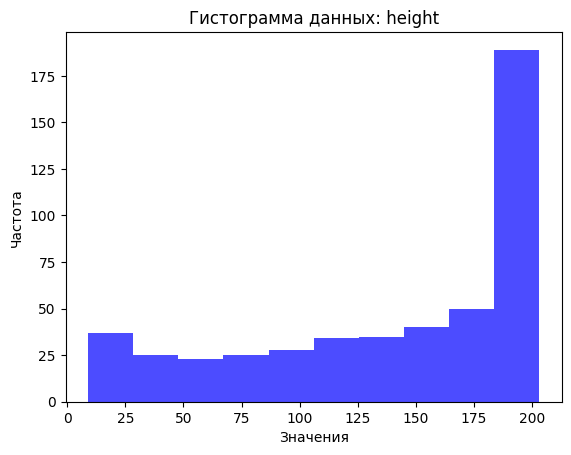

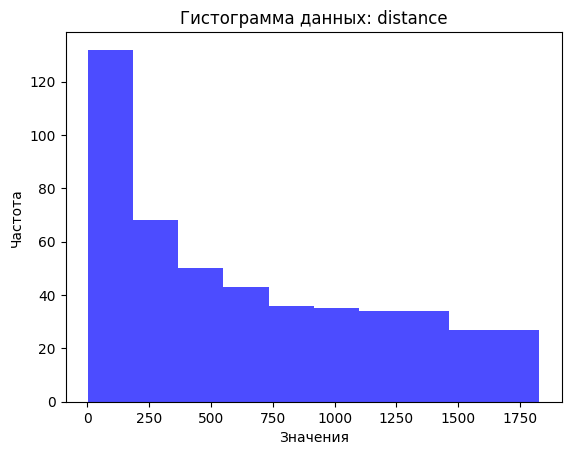

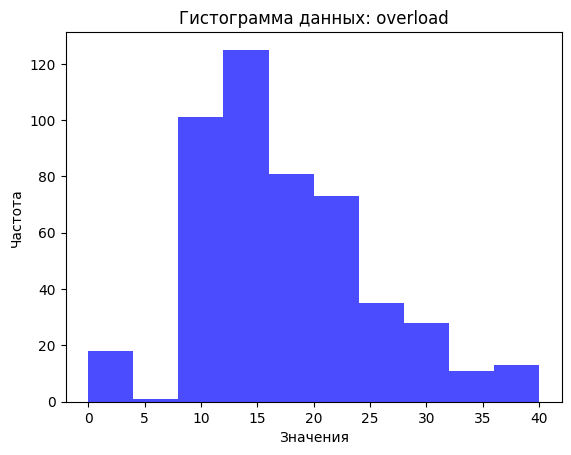

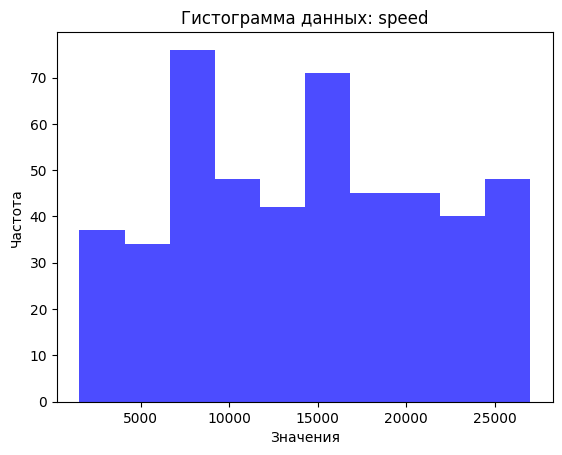

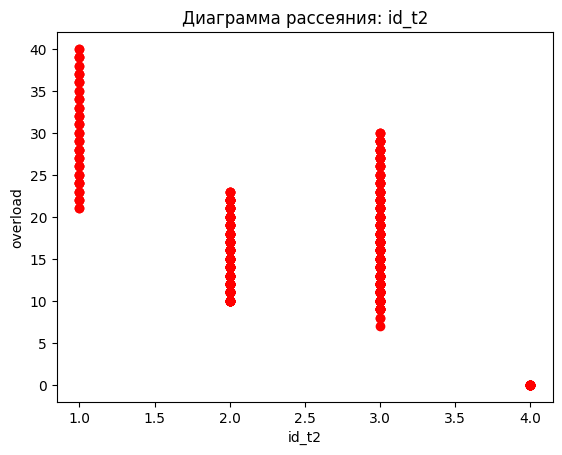

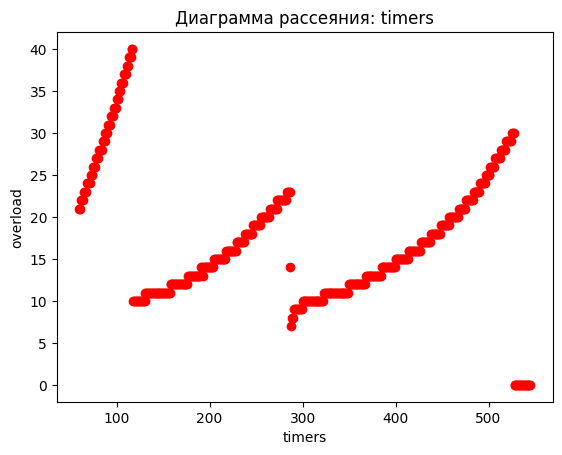

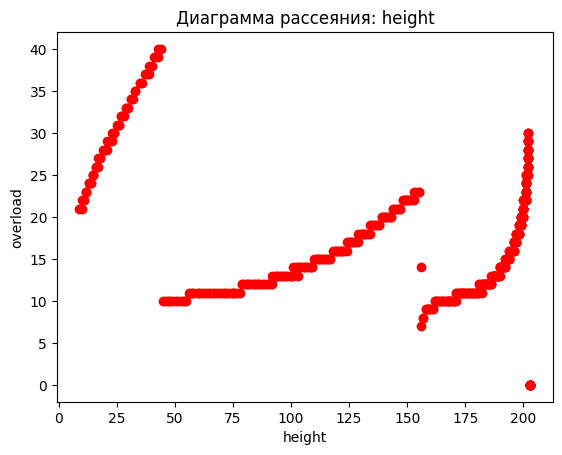

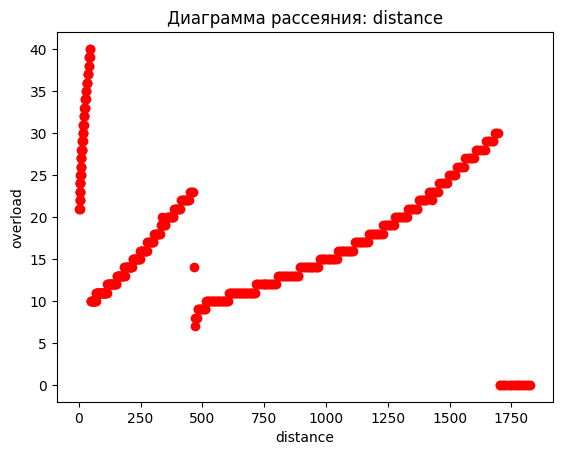

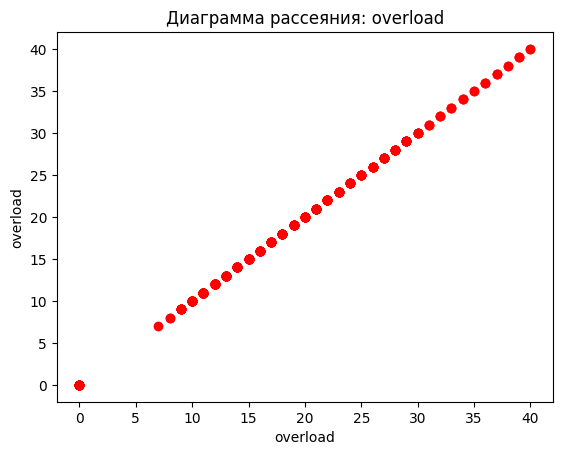

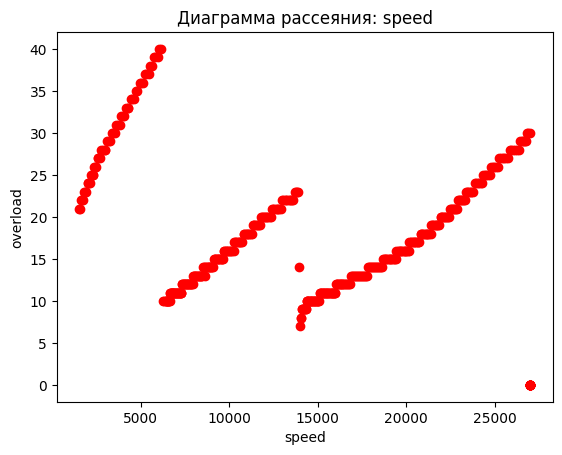

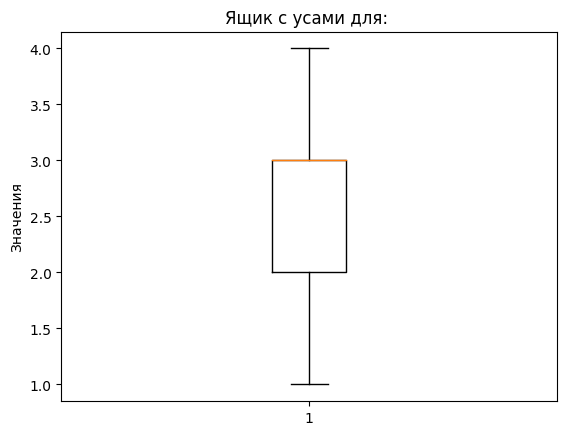

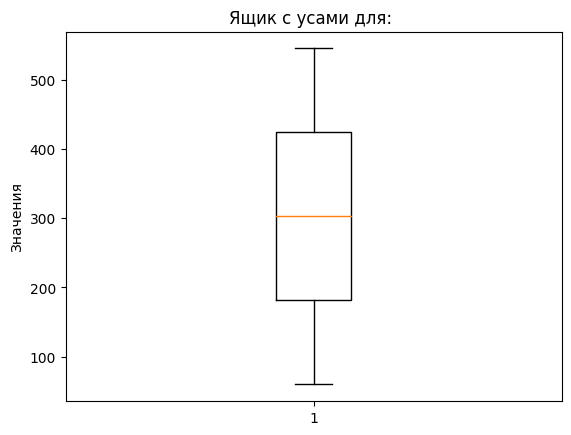

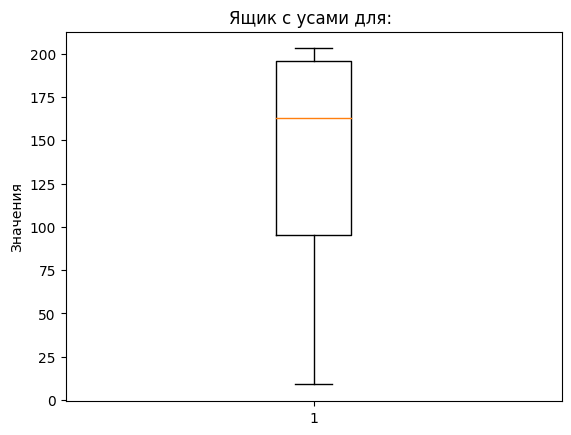

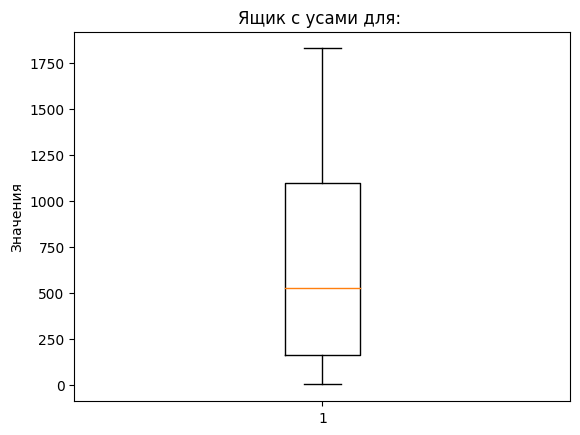

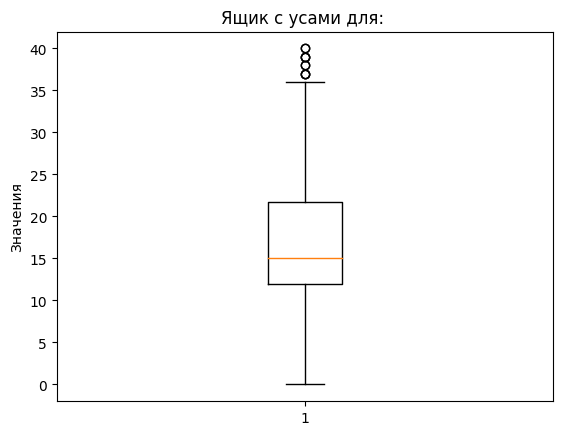

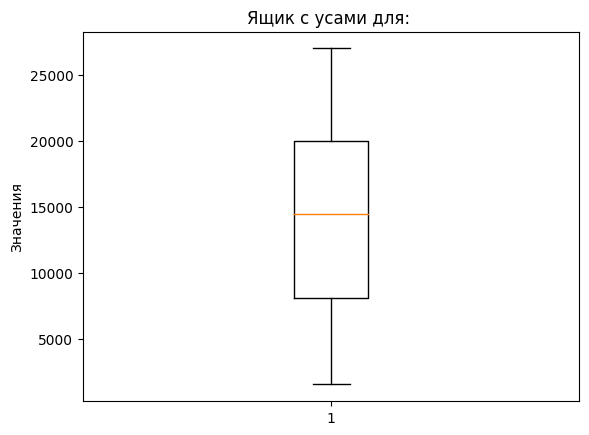

Cреднее для: id_t2 2.450617283950617
----------------------------------------
Медиана для: id_t2 3.0
----------------------------------------
Мода для: id_t2 ModeResult(mode=3, count=241)
Cреднее для: timers 302.5
----------------------------------------
Медиана для: timers 302.5
----------------------------------------
Мода для: timers ModeResult(mode=60, count=1)
Cреднее для: height 140.6172839506173
----------------------------------------
Медиана для: height 163.0
----------------------------------------
Мода для: height ModeResult(mode=202, count=28)
Cреднее для: distance 655.5082304526749
----------------------------------------
Медиана для: distance 525.5
----------------------------------------
Мода для: distance ModeResult(mode=4, count=3)
Cреднее для: overload 17.0
----------------------------------------
Медиана для: overload 15.0
----------------------------------------
Мода для: overload ModeResult(mode=11, count=54)
Cреднее для: speed 14300.38683127572
-------------------

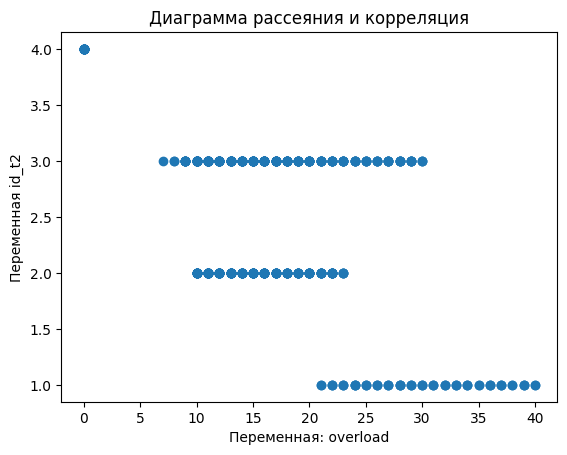

Коэффициент корреляции между: timers и overload -0.16224330485902513
--------------------------------------------------


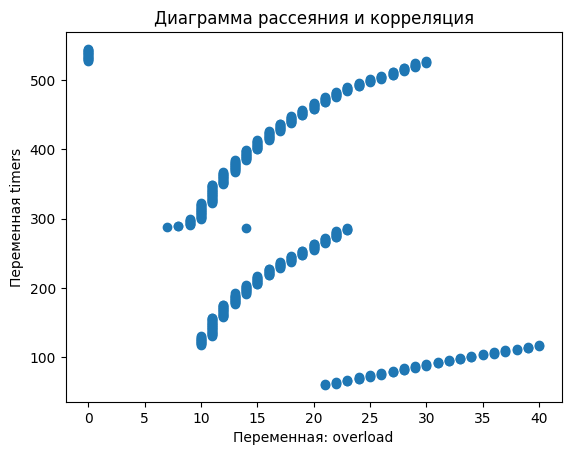

Коэффициент корреляции между: height и overload -0.2798599087730785
--------------------------------------------------


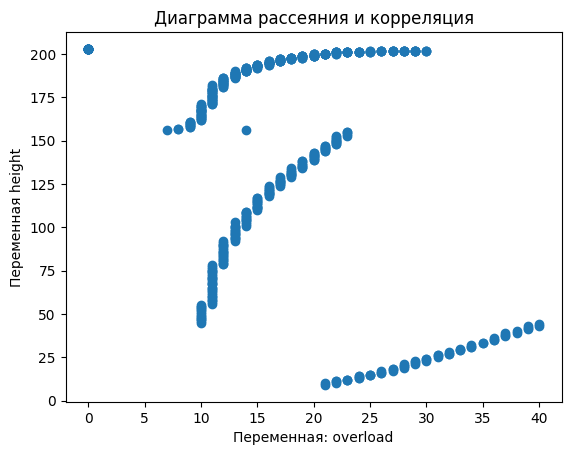

Коэффициент корреляции между: distance и overload -0.07868853547447772
--------------------------------------------------


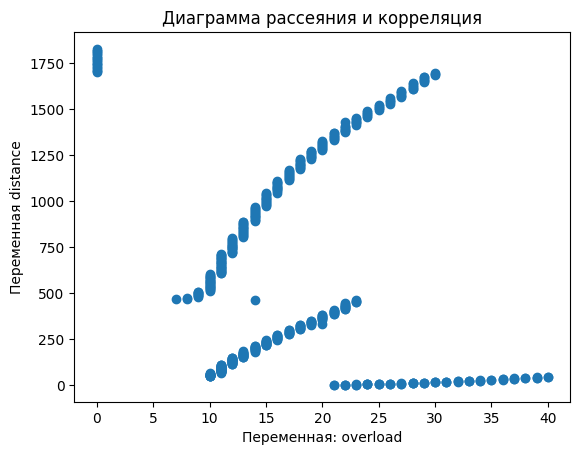

Коэффициент корреляции между: overload и overload 1.0
--------------------------------------------------


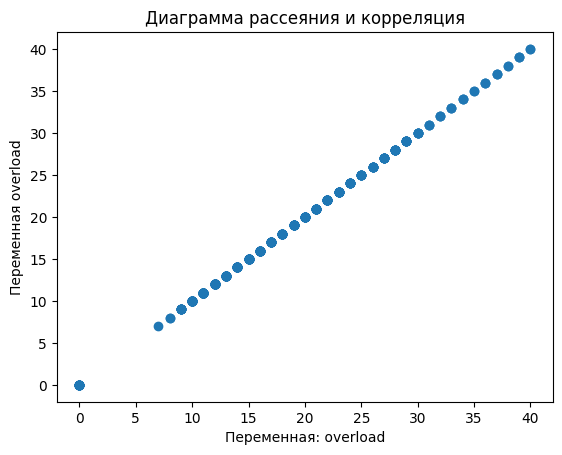

Коэффициент корреляции между: speed и overload -0.15382166503584224
--------------------------------------------------


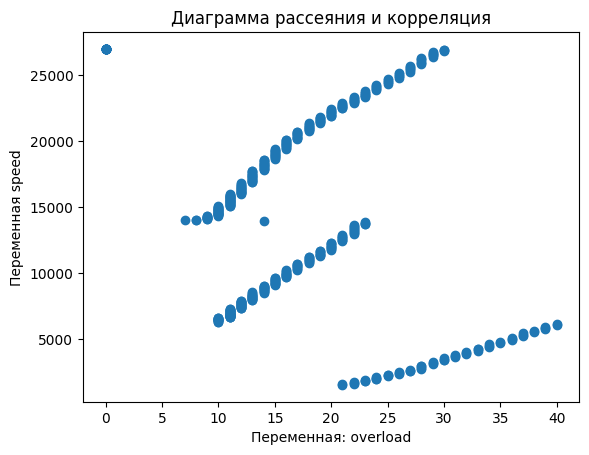

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

##### Построение гистограм столбцов датасета
def form_gis(data):
  column_names = data.columns.tolist()
  for i, feature in enumerate(column_names):
    plt.hist(data[feature], bins=10, color='blue', alpha=0.7)
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.title('Гистограмма данных: ' + feature)
    plt.show()

##### Построение диограмм рассеяния
def form_dir(data, name_s):
  column_names = data.columns.tolist()
  for i, feature in enumerate(column_names):
      x = data[feature]
      y = data[name_s]

      plt.scatter(x, y, color='red')
      plt.xlabel(feature)
      plt.ylabel(name_s)
      plt.title('Диаграмма рассеяния: ' + feature)
      plt.show()

##### Построение box plot (ящик с усами)
def form_bpl(data):
  column_names = data.columns.tolist()
  for i, feature in enumerate(column_names):
      plt.boxplot( data[feature] )
      plt.ylabel('Значения')
      plt.title('Ящик с усами для: ')
      plt.show()

##### Вывод сводной статистики
def form_sus(data):
  column_names = data.columns.tolist()
  for i, feature in enumerate(column_names):
      print('='*40)
      #x = data[feature]

      # Расчет среднего (среднее арифметическое)
      mean = np.mean(data[feature])
      print('Cреднее для: ' + feature, mean)
      print('-'*40)

      # Расчет медианы (среднее значение двух среднеих значений)
      median = np.median(data[feature])
      print('Медиана для: ' + feature, median)
      print('-'*40)

      # Расчет моды (встречается наиболее часто)
      mode = stats.mode(data[feature])
      print('Мода для: ' + feature, mode)
  print('='*40)

##### Корреляционный анализ
def form_kor(data, name_s):
  column_names = data.columns.tolist()
  print('='*50)

  for i, feature in enumerate(column_names):
      x = data[name_s]
      y = data[feature]

      # Расчет коэффициента корреляции Пирсона
      correlation = np.corrcoef(x, y)[0, 1]
      print('Коэффициент корреляции между: ' + feature + ' и ' + name_s, correlation)
      print('-'*50)

      # Визуализация данных
      plt.scatter(x, y)
      plt.xlabel('Переменная: ' + name_s)
      plt.ylabel('Переменная ' + feature)
      plt.title('Диаграмма рассеяния и корреляция')
      plt.show()


### Загрузка данных
data = pd.read_csv('t4.csv', delimiter = ';')
print(data.head())

column_names = data.columns.tolist()
n_cols = len(column_names)

form_gis(data)
form_dir(data, 'overload')
form_bpl(data)
form_sus(data)
form_kor(data, 'overload')